In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns
#import magcolloids as mgc
from matplotlib.patches import Rectangle

#sys.path.insert(0, '../icenumerics')

#import icenumerics as ice

sys.path.insert(0, '../Scripts')
from importlib import reload  
import From_Cairo_to_Shakti as lattices
reload(lattices)

mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

# Vertex Count (theta)

In this script, I will generate the vertex count plot for each theta value. Then I will save the last frame information, to build the transfer of charge picture. 

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-16.0"

In [3]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    #array_coordT = np.tile(array_coord,9*10)# 9 times of charges and 10 experiments 
    print(len(vrt_count),len(array_coord))
    #array_coordT = np.tile(array_coord,round(int(len(vrt_count)/len(array_coord))))# 9 types of charges and 10 experiments 
    array_coordT = np.tile(array_coord[:2],int(len(vrt_count)/2))

    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return vrt_count

In [4]:
theta = np.linspace(np.pi/6, 5*np.pi/180, num= 15, endpoint=True, retstep=False, dtype=None, axis=0)
theta

array([0.52359878, 0.49243218, 0.46126559, 0.43009899, 0.3989324 ,
       0.36776581, 0.33659921, 0.30543262, 0.27426603, 0.24309943,
       0.21193284, 0.18076624, 0.14959965, 0.11843306, 0.08726646])

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp14.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp13.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp3.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp5.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.5235987755982988_exp7.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


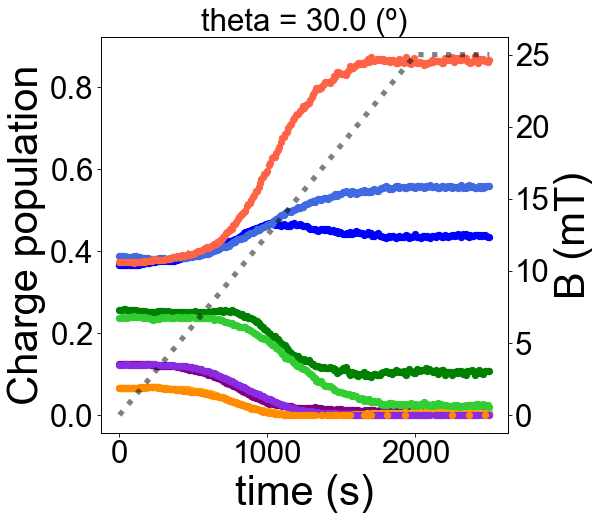

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp7.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp1.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp9.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp3.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4924321818126858_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


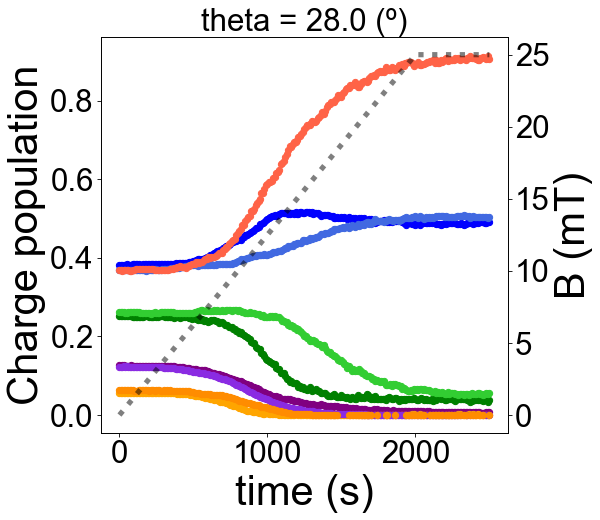

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp11.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp0.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp4.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.4612655880270728_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


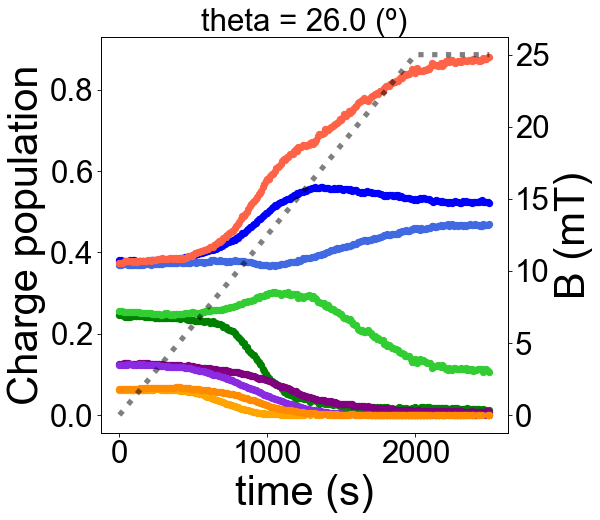

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp4.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp16.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp2.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp14.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp11.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.43009899424145975_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBo

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


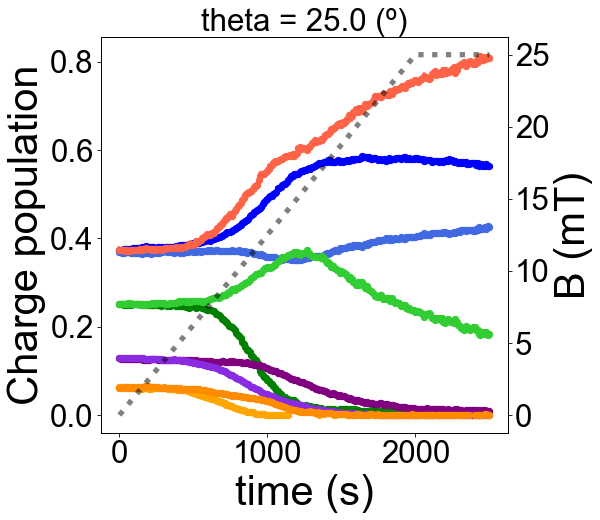

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp16.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp0.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp4.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp13.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp7.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3989324004558467_exp1.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


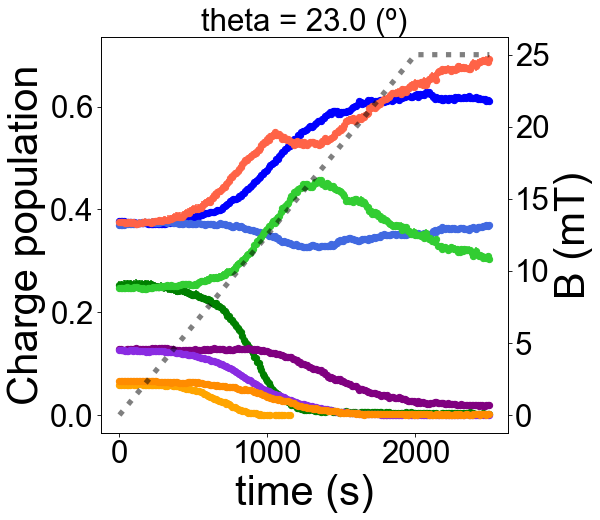

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp2.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp18.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp7.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp14.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp13.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.36776580667023373_exp1.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBo

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


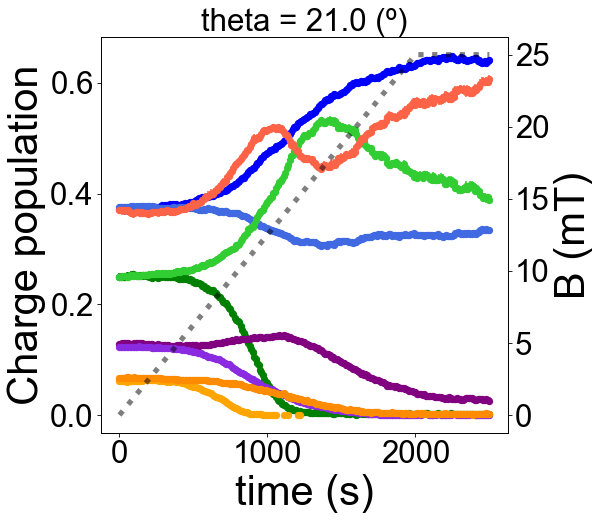

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp2.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp14.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp16.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp5.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp19.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.3365992128846207_exp9.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


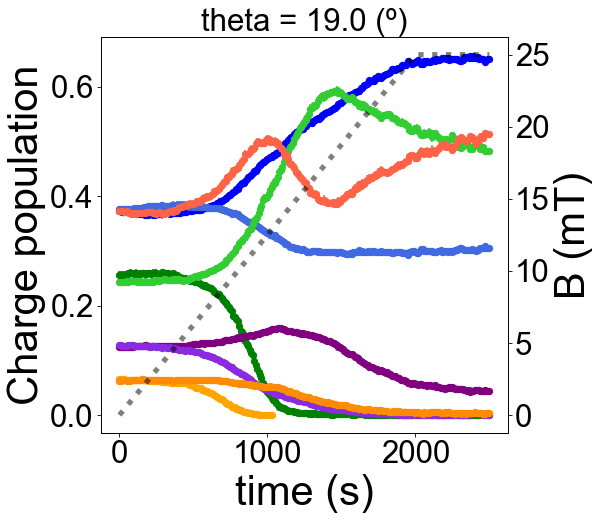

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp13.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp9.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp5.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp2.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp3.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.30543261909900765_exp19.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBou

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


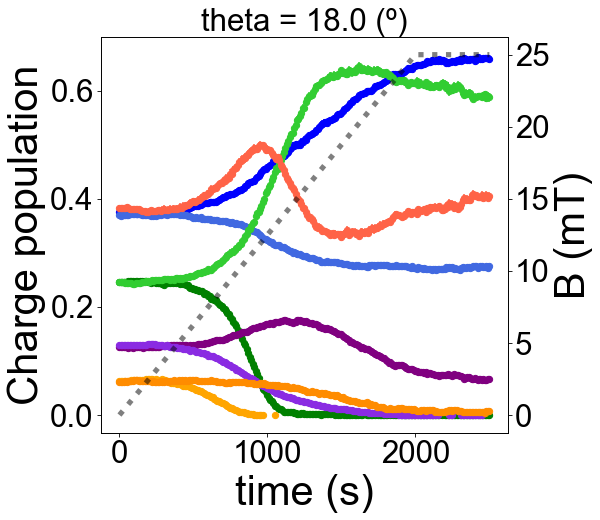

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp0.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp11.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp9.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp7.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2742660253133946_exp14.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_thet

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


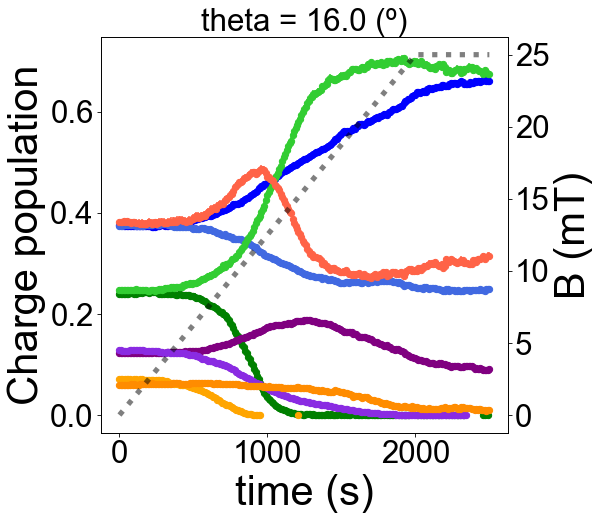

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp16.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp19.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp1.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp2.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.24309943152778163_exp0.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBou

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


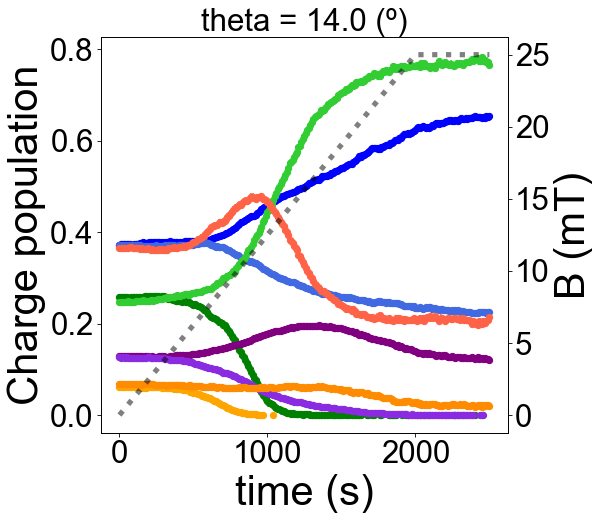

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp0.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp5.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp3.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp16.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp13.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp2.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.2119328377421686_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


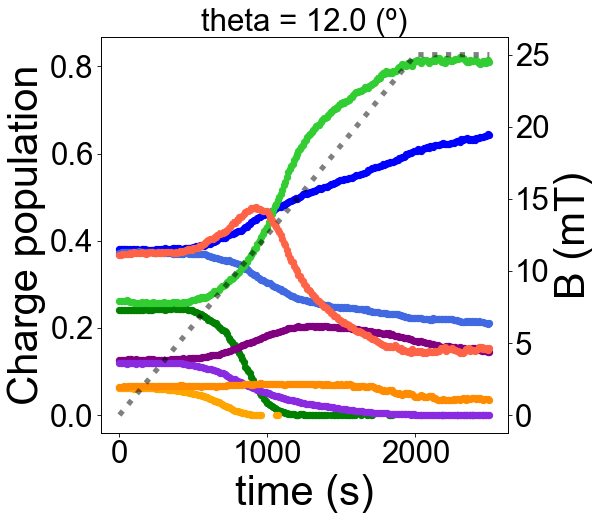

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp19.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp5.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp11.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp6.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp4.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp18.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.18076624395655555_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBo

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


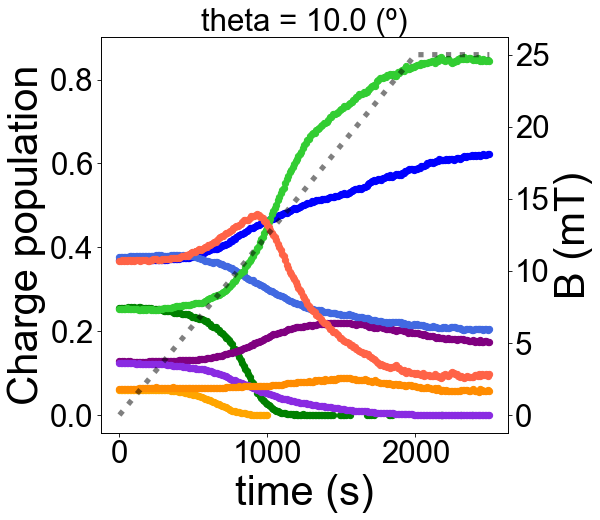

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp19.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp4.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp11.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp7.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp5.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp18.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.14959965017094257_exp3.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBo

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


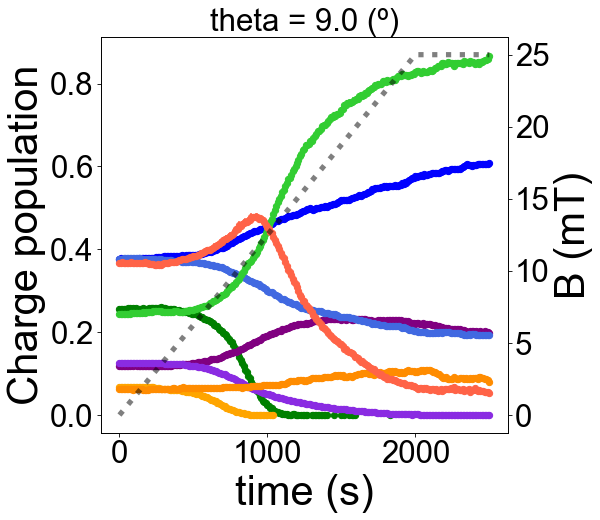

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp8.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp12.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp14.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp13.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp1.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp3.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp0.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.11843305638532953_exp11.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBo

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


90360 1004


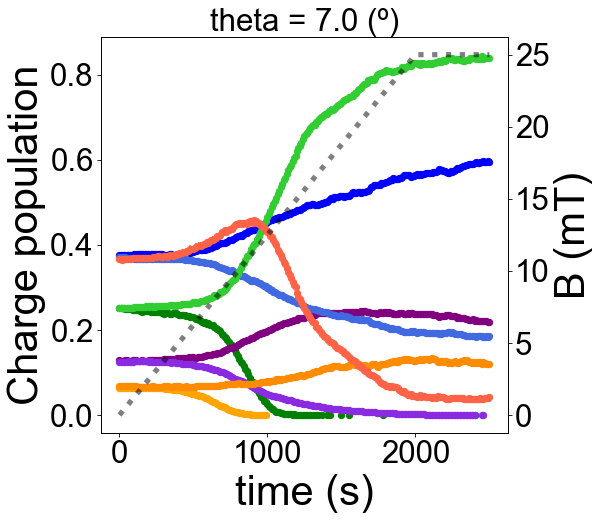

ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp15.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp5.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp9.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp0.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp10.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp19.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp14.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp17.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta0.08726646259971647_exp3.0_keepingTLength.dat
ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBo

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
for i in range(0,15):
    
    Lattices = []
    keys_Lattices = []
    for file in os.listdir(data_directory):
        if fnmatch.fnmatch(file, f"ACI_from_Cairo_to_Shakti_Lattice_25mT-2500s_FreeBound_theta{theta[i]}_exp*_keepingTLength.dat"):
            print(file)
            Lattices.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
            keys_Lattices.append(theta[i])
    
    print(len(Lattices))
    e = np.arange(0,len(Lattices))
    Lattices_exp = pd.concat(Lattices, keys = e)
    print(len(Lattices_exp))

    Lattices_exp.index.names = ['Exp', 'frame', 'id']
    Lattices_exp

### Filter the vertices at the boundaries 

    First_frame = Lattices_exp.loc[0,0]

    d = 13 # Interparticle distance
    trap_sep_l = 10 # trap_sep parameter of the edge connecting 3 coordination and 4 coordination vertices
    s_l4 = d*np.sqrt(2)/2

    # <Generating lattice parameters depending on theta value>
    trap_sep_a, s_l3, a, l, plaquette_cte = lattices.lattice_parameters(theta[i], d, trap_sep_l, s_l4)

    x_min = plaquette_cte/2
    y_min = plaquette_cte

    width = plaquette_cte*16
    hight = plaquette_cte*16

    x_max = x_min+width
    y_max = y_min+hight

    #print(x_min,x_max,y_min,y_max)

    #fig =plt.figure(figsize = (15,15))
    #ax = fig.add_subplot(111)

    #plt.plot(First_frame.x, First_frame.y , 'o')
    #ax.add_patch(Rectangle((x_min, y_min),width, hight,fc ='none', ec ='g',lw = 5))

    Ca = Lattices_exp.loc[(Lattices_exp['x']<x_max) & (Lattices_exp['x']>x_min)]
    Lattices_exp = Ca.loc[(Ca['y']<y_max) & (Ca['y']>y_min)]

    ### Classify vertices

    Lattices_exp["type"] = np.NaN

    # 4-fold vertices classification

    Lattices_exp.loc[Lattices_exp.charge==-4, "type"] = "Q = -4"
    Lattices_exp.loc[Lattices_exp.charge==-2, "type"] = "Q = -2"
    Lattices_exp.loc[Lattices_exp.charge==+2, "type"] = "Q = +2"
    Lattices_exp.loc[Lattices_exp.charge==+4, "type"] = "Q = +4"

    zeroq = Lattices_exp.charge==0

    dipole_magnitude = np.sqrt(Lattices_exp[zeroq].dx**2+Lattices_exp[zeroq].dy**2)

    Lattices_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
    Lattices_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

    # 3-fold vertices classification

    Lattices_exp.loc[Lattices_exp.charge==+1, "type"] = "Q = +1"
    Lattices_exp.loc[Lattices_exp.charge==-1, "type"] = "Q = -1"
    Lattices_exp.loc[Lattices_exp.charge==+3, "type"] = "Q = +3"
    Lattices_exp.loc[Lattices_exp.charge==-3, "type"] = "Q = -3"

    Lattices_exp =Lattices_exp.query('coordination == 4 or coordination == 3')

    count_m = count_vertices(Lattices_exp)

    v_counts_m = count_m.groupby(["frame","type","coordination"]).mean()
    v_counts_m["err"] = count_m['fraction'].groupby(["frame","type","coordination"]).std()/np.sqrt(count_m['fraction'].groupby(["frame","type","coordination"]).count().values)

    #v_counts_m = v_counts_m[(v_counts_m != 0).all(1)]
    v_counts_m = v_counts_m.query('number != 0')
    v_counts_m['time'] = v_counts_m.index.get_level_values('frame')
    

    fig, ax1 = plt.subplots(figsize=(7,7))

    ax2 = ax1.twinx()

    

    for typ_m, mtype in v_counts_m.groupby('type'):

        ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='o', label = typ_m)

    ax1.tick_params(axis='y', labelsize=30)
    ax1.tick_params(axis='x', labelsize=30)  
    ax1.set_title(f"theta = {round(theta[i]*180/np.pi)} (º)", size = 30)
    #ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
    ax1.set_xlabel('time (s)', size = 40)
    ax1.set_ylabel('Charge population', size = 40)

    ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


    ax2.set_ylabel('B (mT)', size = 40)
    ax2.tick_params(axis='y', labelsize=30)
    
    plt.savefig(f"theta_{round(theta[i]*180/np.pi)}_TFixed.png", bbox_inches='tight')
    #v_counts_m.to_csv('FreeBound.dat', sep = "\t")

    plt.show()